In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
bookME = pd.read_csv('book_ratings.csv')
bookME.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1593351348,Wuthering Heights,18.96,AKZ3R4NWFK6ON,"E. Gray ""musiq lovr""",0.142857,5,1260230400,Got this,Got this book version along with Romeo & Julie...
1,1578849209,Natural Atheism,14.04,A384SQPY12385,David B. Pearson,0.950000,5,1135123200,Outstanding Freethought,"Although I've pretty much always been a ""natur..."
2,0613659155,Nights In Rodanthe (Turtleback School & Librar...,19.57,A2GAP7XWBZU8QI,Eric,NaN,4,1065744000,A Decent Novel,The first book I read by Mr. Sparks was 'A Wal...
3,1590594991,Pro Apache Log4j,43.94,A2IAL7V5B0M2LZ,"Wayne Cannon ""Wayne""",1.000000,4,1174176000,Almost identical with excellent on-line material,"This is an excellent reference. However, be aw..."
4,0201328186,"Yellow Fever, Black Goddess: The Coevolution O...",15.27,A14UM7LOF20W6P,Frank,0.666667,3,907200000,Stilted prose,"While the subject of the book is fascinating, ..."


#### (10 pts) Preprocess the text data in each of the "review/summary" and "review/text" columns. Preprocessing should include tokenization, lowercasing, stop word removal, stemming and any other necessary steps. Describe each of the above step in the Word document.

In [13]:
def dim_text():
    dimensions = len(set(bookME["review/text"].str.split().explode().values))
    print(f'{dimensions} dimensions in the DFM.')
    
dim_text()

24438 dimensions in the DFM.


In [14]:
def dim_summary():
    dimensions = len(set(bookME["review/summary"].str.split().explode().values))
    print(f'{dimensions} dimensions in the DFM.')
    
dim_summary()

2383 dimensions in the DFM.


In [15]:
bookME["review/text"] = bookME["review/text"].str.replace(r'[^\w\s]+', '')
dim_text()

24438 dimensions in the DFM.


In [16]:
bookME["review/summary"] = bookME["review/summary"].str.replace(r'[^\w\s]+', '')
dim_summary()

2383 dimensions in the DFM.


In [17]:
bookME["review/text"] = bookME["review/text"].str.lower()
bookME["review/text"].head()

0    got this book version along with romeo & julie...
1    although i've pretty much always been a "natur...
2    the first book i read by mr. sparks was 'a wal...
3    this is an excellent reference. however, be aw...
4    while the subject of the book is fascinating, ...
Name: review/text, dtype: object

In [18]:
bookME["review/summary"] = bookME["review/summary"].str.lower()
bookME["review/summary"].head()

0                                            got this
1                             outstanding freethought
2                                      a decent novel
3    almost identical with excellent on-line material
4                                       stilted prose
Name: review/summary, dtype: object

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

stop = stopwords.words("english")

bookME["review/text"] = bookME["review/text"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

# frequency analysis after removing default stopwords
freq_text = pd.Series(" ".join(bookME["review/text"]).split()).value_counts()[:30]
freq_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjelr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


book       1486
read        497
one         453
like        343
would       323
many        290
good        258
great       253
story       229
book.       220
also        217
books       209
much        204
people      204
time        203
first       199
even        198
get         194
reading     194
love        188
really      182
well        180
book,       180
-           179
author      174
life        171
new         168
way         167
found       162
could       160
Name: count, dtype: int64

In [20]:
bookME["review/summary"] = bookME["review/summary"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))

# frequency analysis after removing default stopwords
freq_text = pd.Series(" ".join(bookME["review/summary"]).split()).value_counts()[:30]
freq_text

book           121
great           93
good            66
read            43
excellent       30
best            28
one             21
must            19
story           16
love            15
book!           15
books           15
wonderful       14
like            11
-               11
ever            11
life            10
review          10
look            10
another         10
.               10
amazing         10
&                9
interesting      9
resource         9
real             9
new              9
little           9
reading          9
time             8
Name: count, dtype: int64

In [21]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
bookME["review/text"] = bookME["review/text"].apply(lambda x: " ".join([st.stem(word)
                                                         for word in x.split()]))
dim_text()

18987 dimensions in the DFM.


In [22]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
bookME["review/summary"] = bookME["review/summary"].apply(lambda x: " ".join([st.stem(word)
                                                         for word in x.split()]))
dim_summary()

1768 dimensions in the DFM.


In [23]:
freq_text = pd.Series(' '.join(bookME["review/text"]).split()).value_counts()[:30]
freq_text

book      1696
read       698
one        479
like       388
would      323
love       296
mani       291
make       286
stori      284
get        275
good       261
time       256
great      256
use        254
author     232
book.      220
also       217
help       215
way        207
peopl      206
much       204
want       203
first      200
even       199
take       197
think      190
find       189
well       182
realli     182
book,      180
Name: count, dtype: int64

In [33]:
stop += ["book", "book.", "read", "would", "get", "use", "also", "book,", "one"]
bookME["review/text"] = bookME["review/text"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))
dim_text()

18960 dimensions in the DFM.


In [34]:
freq_text = pd.Series(' '.join(bookME["review/summary"]).split()).value_counts()[:30]
freq_text

great       94
good        66
excel       31
best        28
love        23
one         21
must        19
stori       19
wonder      17
like        14
look        14
interest    11
ever        11
amaz        11
life        10
time        10
anoth       10
resourc      9
real         9
new          9
littl        9
need         9
seri         8
write        8
read!        8
fun          8
help         8
learn        8
enjoy        7
expect       7
Name: count, dtype: int64

In [30]:
stop += ["book", "book!", "-", ".", "&", "review", "use"]
bookME["review/summary"] = bookME["review/summary"].apply(lambda x: " ".join(x for x in x.split()
                                                         if x not in stop))
dim_summary()

1757 dimensions in the DFM.


#### (7 pts) Create word clouds for each of the "review/summary" and "review/text" columns, after preprocessing. Copy and paste the word clouds outputs in the Word document. Write one-two sentences for what you can interpret from each of the two word clouds. ##

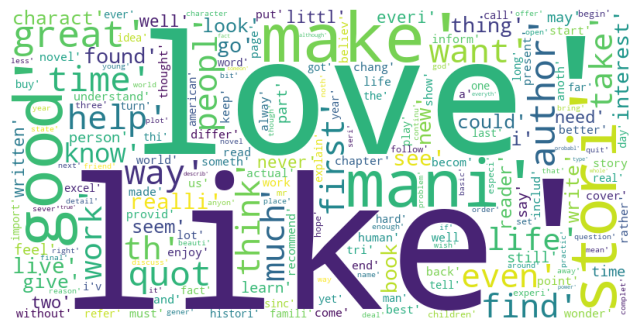

In [36]:
from wordcloud import WordCloud

comment_words_text = str(' '.join(bookME["review/text"]).split())

# word cloud
wordcloud_text = WordCloud(width=800, height=400, background_color='white').generate(comment_words_text)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400, 
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud_text)
plt.axis('off')
plt.show()

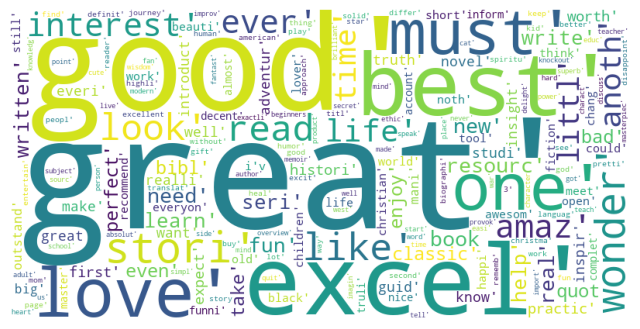

In [37]:
from wordcloud import WordCloud

comment_words_summary = str(' '.join(bookME["review/summary"]).split())

# word cloud
wordcloud_summary = WordCloud(width=800, height=400, background_color='white').generate(comment_words_summary)

# if you get font error, can try the following
# wordcloud = WordCloud(font_path='/path/to/your/font.ttf', width=800, height=400, 
# background_color='white').generate(sample_text)

plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud_summary)
plt.axis('off')
plt.show()

#### (8 pts) Perform text mining for each of the "review/summary" and "review/text" columns  to estimate the similarity between documents. Show the similarity output tables for the  first 5 documents for the summary and text columns. Paste the appropriate screenshots  in the Word document. 

Review/Summary

In [38]:
corpus_sum = [doc.split() for doc in bookME["review/summary"]]

In [40]:
import gensim
from gensim import corpora, models

dictionary_sum = corpora.Dictionary(corpus_sum)

In [41]:
dictionary_sum.filter_extremes(no_below = 2, no_above = 0.75)
DFM_sum = [dictionary_sum.doc2bow(doc) for doc in corpus_sum]
print(DFM_sum)

[[(0, 1)], [(1, 1)], [(2, 1), (3, 1)], [(4, 1), (5, 1)], [], [(6, 1), (7, 1)], [(8, 1)], [(9, 1), (10, 1)], [(9, 1)], [(9, 1), (11, 1), (12, 1)], [], [(5, 1), (13, 1), (14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1)], [(20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1)], [(9, 1), (28, 1)], [(12, 1), (29, 1)], [(30, 1)], [(31, 1)], [(12, 1), (32, 1)], [(9, 1), (33, 1), (34, 1)], [(24, 1), (35, 1)], [(36, 1)], [(28, 1), (37, 1)], [(18, 1), (32, 1)], [(9, 1), (12, 1)], [(38, 1), (39, 1)], [], [], [], [(40, 1)], [(41, 1), (42, 1)], [(34, 1)], [(43, 1)], [(9, 1)], [(7, 1), (44, 1)], [(9, 1), (45, 1), (46, 1), (47, 1)], [(48, 1)], [(26, 1)], [], [(2, 1), (26, 1), (49, 1)], [(45, 1), (50, 1)], [(5, 1)], [], [(51, 1)], [(48, 1)], [(3, 1), (52, 1)], [(53, 1), (54, 1)], [(5, 1), (55, 1), (56, 1)], [(49, 1), (57, 1)], [(58, 1), (59, 1), (60, 1), (61, 1)], [(62, 1), (63, 1)], [(64, 1), (65, 1), (66, 1)], [(67, 1)], [], [(9, 1)], [(34, 1), (68, 1)], [(14, 1), (69, 1)], 

In [42]:
from gensim.similarities import MatrixSimilarity
simil_sum = MatrixSimilarity(DFM_sum, num_features=len(dictionary_sum))
distance_sum = 1 - simil_sum[DFM_sum]

# convert simil to a data frame
text_sim_sum = pd.DataFrame(simil_sum[DFM_sum])
text_sim_sum[2]

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: 2, Length: 1000, dtype: float32

In [43]:
text_sim_sum[0:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Review/Text

In [44]:
corpus_text = [doc.split() for doc in bookME["review/text"]]
import gensim
from gensim import corpora, models

dictionary_text = corpora.Dictionary(corpus_text)

dictionary_text.filter_extremes(no_below = 2, no_above = 0.75)
DFM_text = [dictionary_text.doc2bow(doc) for doc in corpus_text]
print(DFM_text)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)], [(6, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(19, 1), (21, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 2), (85, 2), (86, 1), (87, 1)], [(32, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1

In [45]:
from gensim.similarities import MatrixSimilarity
simil_text = MatrixSimilarity(DFM_text, num_features=len(dictionary_text))
distance_text = 1 - simil_text[DFM_text]

# convert simil to a data frame
text_sim_text = pd.DataFrame(simil_text[DFM_text])
text_sim_text[2]

0      0.000000
1      0.034381
2      1.000000
3      0.000000
4      0.031643
         ...   
995    0.045285
996    0.028072
997    0.065233
998    0.087960
999    0.033464
Name: 2, Length: 1000, dtype: float32

In [46]:
text_sim_text[0:5]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.037268,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.062932,...,0.070711,0.000000,0.000000,0.000000,0.000000,0.049088,0.000000,0.000000,0.190693,0.000000
1,0.037268,1.000000,0.034381,0.045361,0.076697,0.064790,0.057354,0.0,0.000000,0.105540,...,0.000000,0.028583,0.000000,0.037268,0.014292,0.082323,0.045361,0.000000,0.000000,0.027037
2,0.000000,0.034381,1.000000,0.000000,0.031643,0.071281,0.070987,0.0,0.052680,0.029028,...,0.097849,0.000000,0.000000,0.000000,0.070755,0.045285,0.028072,0.065233,0.087960,0.033464
3,0.000000,0.045361,0.000000,1.000000,0.062622,0.047023,0.000000,0.0,0.023168,0.019149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.014937,0.037037,0.043033,0.000000,0.000000
4,0.000000,0.076697,0.031643,0.062622,1.000000,0.086132,0.087977,0.0,0.052231,0.086342,...,0.000000,0.000000,0.038348,0.017150,0.052613,0.143115,0.062622,0.000000,0.000000,0.000000


#### 4. (10 pts) Perform topic modeling on “review/text” using LDA model and generate 6 topics. In the word document, show the topic model output for each of the 6 topics as the linear combination of the terms. For 2 of the topics, write a short description in 2-3 sentences for each topic.

In [47]:
n_topics = 6
ldamodel = models.LdaModel(DFM_text, num_topics=n_topics, id2word=dictionary_text, passes=40)

print(ldamodel.print_topics(num_topics=n_topics, num_words=10))

[(0, '0.006*"great" + 0.005*"mani" + 0.005*"write" + 0.005*"like" + 0.004*"first" + 0.004*"think" + 0.004*"i\'m" + 0.004*"way" + 0.004*"worth" + 0.004*"find"'), (1, '0.010*"stori" + 0.007*"like" + 0.006*"life" + 0.006*"love" + 0.006*"good" + 0.005*"great" + 0.005*"want" + 0.005*"make" + 0.004*"realli" + 0.004*"time"'), (2, '0.006*"make" + 0.006*"mani" + 0.005*"time" + 0.005*"author" + 0.005*"peopl" + 0.005*"much" + 0.004*"live" + 0.004*"even" + 0.004*"new" + 0.004*"stori"'), (3, '0.008*"like" + 0.007*"stori" + 0.005*"charact" + 0.004*"time" + 0.004*"author" + 0.004*"great" + 0.004*"mani" + 0.004*"enjoy" + 0.004*"make" + 0.004*"good"'), (4, '0.010*"like" + 0.010*"good" + 0.005*"help" + 0.005*"learn" + 0.005*"think" + 0.005*"want" + 0.005*"work" + 0.005*"mani" + 0.005*"great" + 0.005*"realli"'), (5, '0.014*"love" + 0.006*"like" + 0.004*"much" + 0.004*"peopl" + 0.004*"go" + 0.004*"think" + 0.003*"christian" + 0.003*"way" + 0.003*"find" + 0.003*"first"')]


In [48]:
import pyLDAvis
pyLDAvis.enable_notebook()

import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(ldamodel, DFM_text, dictionary_text)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.011002  0.012363       1        1  32.595768
3     -0.025847 -0.002504       2        1  19.377195
1      0.012513 -0.002340       3        1  16.354665
4      0.114393 -0.038207       4        1  15.963206
5     -0.078369 -0.072431       5        1   8.612529
0     -0.011687  0.103119       6        1   7.096636, topic_info=        Term        Freq       Total Category  logprob  loglift
67      love  266.000000  266.000000  Default  30.0000  30.0000
23      good  239.000000  239.000000  Default  29.0000  29.0000
80     stori  260.000000  260.000000  Default  28.0000  28.0000
66      like  352.000000  352.000000  Default  27.0000  27.0000
506     busi   44.000000   44.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
182  charact   12.126793  159.549706   Topic6  -5.8115   0.0686
67      love   13.331309  266.290733   Topic6  -5.7168  -0.3489
572     time   12.762053  235.679722   Topic6  -5.7604  -0.2704
137     make   12.897643  263.936420   Topic6  -5.7498  -0.3731
220     help   12.420359  197.295105   Topic6  -5.7876  -0.1198

[522 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5164      6  0.793650  "these
2546      1  0.055478   &amp;
2546      4  0.055478   &amp;
2546      5  0.832165   &amp;
3248      4  0.880426   (what
...     ...       ...     ...
357       3  0.260983    year
357       4  0.112858    year
357       5  0.098751    year
357       6  0.028214    year
2101      3  0.964847   youth

[1151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 5, 6, 1])

#### (15 pts) Build predictive models for review/score, as follows: a. Apply SVD to extract 5 components from the “review/text” column. b. Combine two non-text columns with the 5 extracted components and build a decision tree model to predict the “review/score”. Call it Model-1. c. Report the confusion matrix of Model 1. d. Repeat tasks 5a-c with SVD to extract 8 components and build a predictive model. Call it Model-2. Report the confusion matrix of Model-2. e. Which model performs better? Explain your answer.

In [68]:
tfidf = models.TfidfModel(DFM_text)
DFM_tfidf = tfidf[DFM_text]

n_SVD = 5
SVD_model_1 = models.LsiModel(DFM_tfidf, id2word=dictionary_text, num_topics=n_SVD)
SVD_1 = SVD_model_1[DFM_tfidf]

svd_array_1 = gensim.matutils.corpus2csc(SVD_1).T.toarray()

svd_df_1 = pd.DataFrame(svd_array_1)

svd_df_1

c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


,0,1,2,3,4
0,0.050616,-0.008910,0.033859,-0.051239,-0.040650
1,0.150918,0.048013,0.013490,-0.043916,-0.055173
2,0.117609,-0.086646,-0.016016,0.046591,0.005316
3,0.070280,0.077252,0.062266,0.028742,-0.000993
4,0.152915,0.074151,-0.066392,0.033879,0.003834
...,...,...,...,...,...
995,0.157837,0.012695,-0.122800,0.005501,0.012144
996,0.098747,-0.018821,-0.066860,0.127903,0.005901
997,0.083208,-0.054141,-0.056922,0.068240,-0.055416
998,0.076967,-0.001559,0.028922,-0.043121,-0.041448


In [69]:
non_text_df_1 = pd.DataFrame({'Price': bookME['Price'], 'review/helpfulness': bookME['review/helpfulness'],
                            '1': svd_df_1[0], '2': svd_df_1[1], '3': svd_df_1[2], 
                            '4': svd_df_1[3], '5': svd_df_1[4]})

X = non_text_df[['Price', 'review/helpfulness', '1', '2', '3', '4', '5']]
y = bookME['review/score']

X.info()
y.info()

X = X[:715]
y = y[:715]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1000 non-null   float64
 1   review/helpfulness  715 non-null    float64
 2   1                   1000 non-null   float64
 3   2                   1000 non-null   float64
 4   3                   1000 non-null   float64
 5   4                   1000 non-null   float64
 6   5                   1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: review/score
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = DecisionTreeClassifier()

model_1.fit(X_train_1, y_train_1)

y_pred_1  = model_1.predict(X_test_1)

accuracy = accuracy_score(y_test_1, y_pred_1)
print(accuracy)

matrix = confusion_matrix(y_test_1, y_pred_1)
print(matrix)



0.6433566433566433
[[ 0  0  0  0  9]
 [ 0  0  0  0  3]
 [ 0  0  0  0 13]
 [ 0  0  0  0 25]
 [ 0  1  0  0 92]]


In [71]:
n_SVD = 8
SVD_model_2 = models.LsiModel(DFM_tfidf, id2word=dictionary_text, num_topics=n_SVD)
SVD_2 = SVD_model_2[DFM_tfidf]

svd_array_2 = gensim.matutils.corpus2csc(SVD_2).T.toarray()

svd_df_2 = pd.DataFrame(svd_array_2)

non_text_df_2 = pd.DataFrame({'Price': bookME['Price'], 'review/helpfulness': bookME['review/helpfulness'],
                            '1': svd_df_2[0], '2': svd_df_2[1], '3': svd_df_2[2], 
                            '4': svd_df_2[3], '5': svd_df_2[4]})

X_2 = non_text_df_2[['Price', 'review/helpfulness', '1', '2', '3', '4', '5']]
y_2 = bookME['review/score']

X_2.info()
y_2.info()

X_2 = X[:715]
y_2 = y[:715]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

model_2 = DecisionTreeClassifier()

model_2.fit(X_train_2, y_train_2)

y_pred_2  = model_2.predict(X_test_2)

accuracy = accuracy_score(y_test_2, y_pred_2)
print(accuracy)

matrix = confusion_matrix(y_test_2, y_pred_2)
print(matrix)



c:\Users\mjelr\AppData\Local\Programs\Python\Python310\lib\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1000 non-null   float64
 1   review/helpfulness  715 non-null    float64
 2   1                   1000 non-null   float64
 3   2                   1000 non-null   float64
 4   3                   1000 non-null   float64
 5   4                   1000 non-null   float64
 6   5                   1000 non-null   float64
dtypes: float64(7)
memory usage: 54.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: review/score
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
0.6363636363636364
[[ 0  0  0  0  9]
 [ 0  0  0  0  3]
 [ 0  0  0  0 13]
 [ 0  0  0  0 25]
 [ 0  1  0  1 91]]
